<a href="https://colab.research.google.com/github/hillerj1/PHY_310/blob/main/Verlet_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5: Euler/Verlet

## Library Imports Go Here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Basic Euler Method

### Building the Algorithm

<font color = blue>
    
Construct an algorithm that implements the basic Euler method to solve the first order differential equation

$$
\frac{dx}{dt} = F((x(t), t)
$$

It should take as inputs the `function` ($F$, assumed to be of two variables), the initial value `x_initial`, the step size `time_step`, and the total number of steps`step_count` = $N$.  It should output two arrays of $N+1$ elements, the first of which is of the form $\{t_n\}$ with first element $0$, and the second of which is of the form $\{x_n\}$, with first element $x_0$ = `x_initial`.

In [ ]:
def euler(F, x_initial, time_step, n):
    ts = np.zeros((n+1,)) + 0
    xs = np.zeros((n+1,2)) + x_initial

    for i in range(n):
        xs[i+1] = xs[i] + (F(xs[i], ts[i]) * time_step)
        ts[i+1] = ts[i] + time_step
    return ts, xs

### Initial Testing

<font color = blue>
Consider the differential equation

$$
\frac{dx}{dt} = -x \, , \hspace{.75in} x(0) = 10 \, .
$$


<font color = blue>
    
Use your Euler method function to find the solution to this differential equation, using a step size of 0.01 and working out to 1000 steps.  Plot your results.  (In order to do this, you will first need to create the `function` $F(x, t)$ that defines the differential equation.)


Then, as a **discussion**, find the analytic solution to the differential equation.  Include that solution on the graph you create, and confirm that (at least visually) the analytic and numerical solutions are in good agreement.

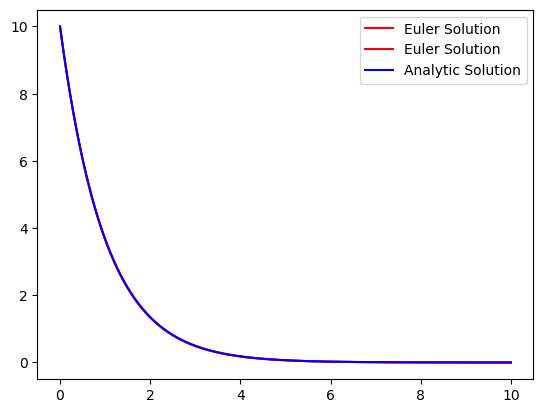

In [ ]:
def F(x, t):
    return -x


ts, xs = euler(F, 10, .01, 1000)
t = np.linspace(10, 0, 1000)

plt.plot(ts, xs, color = 'r', label = 'Euler Solution')
plt.plot(t, 10 * np.exp(-t), color = 'b', label = 'Analytic Solution')
plt.legend()
plt.show()

$\frac{dx}{dt} = -x$, $x(0) = 10$ $gives: x(t) = 10e^{-t} \$

I can confirm that the analytic and numerical/euler solution overlap and are very similar.

### Examining Global Error

<font color = blue>
    
Next we want to examine "global error" (the accumulated discrepancy between an analytic result and a numerical one after a large number of steps are taken to extrapolate to some particular time $T$).

To do so, we will use the (analytically solvable) differential equation

$$
\frac{dx}{dt} = t, \hspace{.5in} x(0) = 0 \, .
$$

and compare the analytic solution to the numerical solution at time $T$.

In [ ]:
def F(x, t):
    return t

#### Analytic Work -- Discussion Section

<font color = blue>

What makes this a particularly good test case is that not only can the differential equation be solved exactly, it is also possible to write down analytically what the Euler method solution will give, which means we can make a prediction for what the global error should be.

First, solve the differential equation analytically, to find $x(t)$.

Then, using the Euler rule, (still analytically) determine $x_N$, the position Euler will give after $N$ steps of size $\Delta t$.  

Then, work out the discrepancy $\delta = x(t_N) - x_{N}$ after $N$ steps, and rewrite this in terms of $T$ (the time you are at after $N$ steps) and $\Delta t$.

$\frac{dx}{dt} = t,  x(0)=0$  $\rightarrow$ $\ x(t) = \frac{1}{2}t^2 $

$x_1 = x_0 + F(x_0, 0)$$\Delta t = 0$
\
$x_2 = x_1 + F(x_1, \Delta t)$$\Delta t = (\Delta t)^2$
\
$x_3 = x_2 + F(x_2, \Delta t)$$\Delta t = 3(\Delta t)^2$
\
$x_4 = x_3 + F(x_3, 3\Delta t)$$\Delta t = 6(\Delta t)^2$
\
$\ x_n = (\Delta t)^2(\frac{N(N-1)}{2})$



$\delta = x(t_n) - x_n$
\
$\delta = \frac{N^2}{2}(\Delta t)^2 - (\Delta t)(\frac{N(N-1)}{2})$
\
Given $N = \frac{T}{\Delta t} \rightarrow T = N\Delta t$
\
$\delta = \frac{T^2}{2} - \frac{T^2}{2} + \frac{T\Delta t}{2}$
\
$\delta = \frac{T\Delta t}{2}$

#### Numerical Work and Comparison

<font color = blue>

Now we want to confirm this prediction, using $T = 1$.  Create a function that takes as its input just `step_count`, and outputs the magnitude of the discrepancy $\delta$ between the analytic solution $x(1)$ and the numerical approximation to it (using your Euler code).  Use this to generate data for $\Delta t$ vs. $\delta$ with $N$ in the range $[10, 1000]$ and then plot the results.  In a **discussion**, assess the results.  Are they consistent with the expected global error behavior?

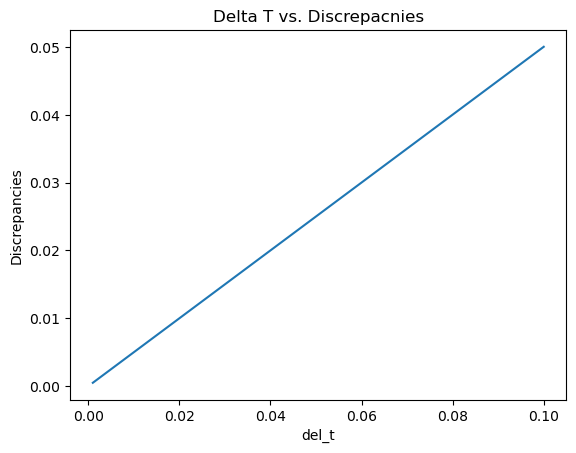

In [ ]:
def comparison(step_count):
    T = 1
    del_t = T/step_count
    ts, x = euler(F, 0, del_t, step_count)
    euler_x = x
    euler_t = ts * step_count
    analytic_x = np.linspace(0, step_count+1, step_count)
    analytic_discrep = np.linspace(0, step_count+1, step_count)
    euler_discrep = (T * ts) / 2
    for i in range(step_count):
        analytic_x[i] = (del_t)**2 * (step_count*(step_count-1))/2
        analytic_discrep[i] = (T * ts[i]) / 2


    return euler_discrep[-1] - analytic_discrep[-1]

n = np.linspace(10, 1000, 100)
del_t = 1 / n
discrepancies = [comparison(int(steps)) for steps in n]

plt.plot(del_t, discrepancies)
plt.title('Delta T vs. Discrepacnies')
plt.xlabel('del_t')
plt.ylabel('Discrepancies')
plt.show()


The expected global error should be linear and the graph above follows that estimate.

## Instability in the Euler Method

### Euler for a Second Order Differential Equation

<font color = blue>
Use the Euler algorithm to find a numerical solution to the second order differential equation

$$
\frac{d^2x}{dt^2} = -4\pi^2 x \, ,
$$

with the initial conditions $x_0 = 1$, $v_0 = 0$.  Set the time step size to be $0.01$, and take 500 steps.  

Depending slightly on the details of how your essential Euler function was written, you should be able to use that code here to solve this *second order* differential equation!

Find the analytic solution with these initial conditions as well (as a **discussion**), and plot the two together.

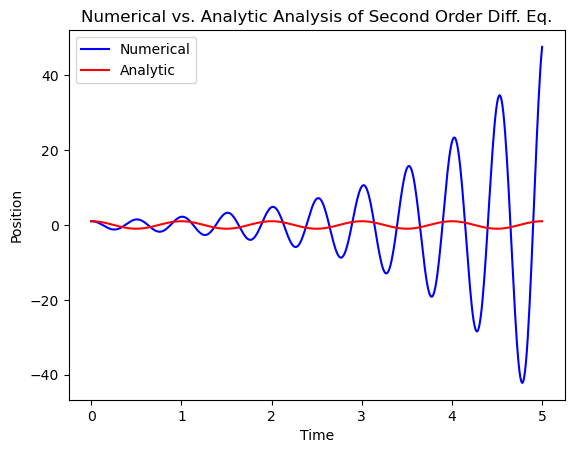

In [ ]:
def vec_F(vec_f, t):
    return np.array([vec_f[1], -(4 * np.pi)**2 * vec_f[0]])

initial_vals = np.array([1, 0])
t_numerical, xv_numerical = euler(vec_F, initial_vals, .01, 500)
x_numerical, v_numerical = np.split(xv_numerical,2,axis=1)

t_analytic = np.linspace(0, 500 * .01, 500 + 1)
x_analytic = np.cos(2*np.pi*t_analytic)

plt.plot(t_numerical, x_numerical, color = 'b', label = 'Numerical')
plt.plot(t_analytic, x_analytic, color = 'r', label = 'Analytic')
plt.title('Numerical vs. Analytic Analysis of Second Order Diff. Eq.')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

$x(t) = cos(2\pi t)$
\
Which gives,
$\downarrow$
\
$x(t_1) = cos(t_2\pi)$
\
$x(t_2) = cos(t_3\pi)$
\
$x(t_3) = cos(t_4\pi)$
\
$x(t_n) = cos(t_{n+1}\pi)$

### Dependence on $\Delta t$

<font color = blue>
Decrease the value of $\Delta t$ by a factor of 2.  Confirm that while over the same time scale used above we see less growth, if we double the time scale the amount of growth is comparable.

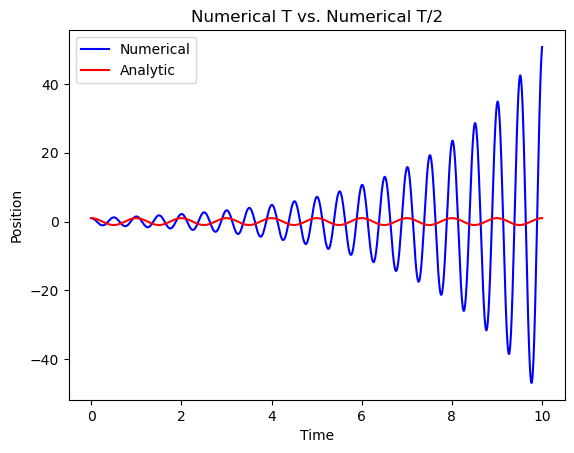

In [ ]:
initial_vals = np.array([1, 0])
t_numerical, xv_numerical = euler(vec_F, initial_vals, .01 / 2, 1000*2)
x_numerical, v_numerical = np.split(xv_numerical,2,axis=1)

t_analytic = np.linspace(0, (1000) *.01, (1000*2) + 1)
x_analytic = np.cos(2*np.pi*t_analytic)

plt.plot(t_numerical, x_numerical, color = 'b', label = 'Numerical')
plt.plot(t_analytic, x_analytic, color = 'r', label = 'Analytic')
plt.title('Numerical T vs. Numerical T/2')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

Same growth is observed when the time_step is divided by a factor of 2 and the time is doubled.

### Growth Correction

<font color = blue>
Add an artificial damping term to the original differential equation so that we have

$$
\frac{d^2x}{dt^2} = -4\pi^2x - 2\beta\frac{dx}{dt}
$$

as our differential equation.  Use the same initial conditions as in the previous section, and set $\Delta t = .01$ and $N = 500$.  Choose the value of $\beta$ so that the damping cancels out the parasitic growth of the numerical solution.  (Explain your choice as a **discussion**).  Again plot the result against the analytic solution -- not to this differential equation but to the original equation studied above.

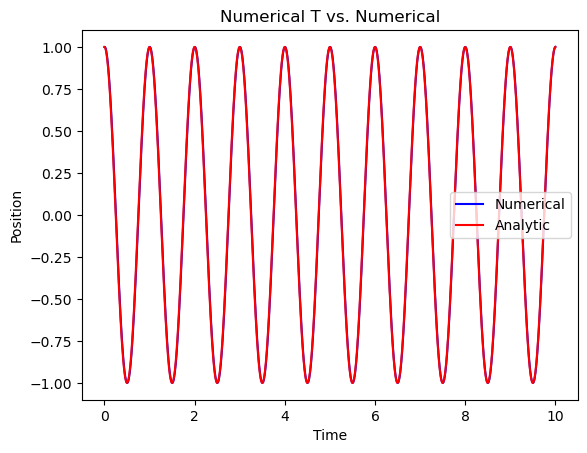

In [ ]:
def vec_F(vec_f, t):
    b = (2*np.pi)**2*(.01)/2
    return np.array([vec_f[1], -(4) * np.pi**2 * vec_f[0] - (2 * b * vec_f[1])])

initial_vals = np.array([1, 0])
t_numerical, xv_numerical = euler(vec_F, initial_vals, .01 , 1000)
x_numerical, v_numerical = np.split(xv_numerical,2,axis=1)

t_analytic = np.linspace(0, 1000 *.01, (1000*2) + 1)
x_analytic = np.cos(2*np.pi*t_analytic)

plt.plot(t_numerical, x_numerical, color = 'b', label = 'Numerical')
plt.plot(t_analytic, x_analytic, color = 'r', label = 'Analytic')
plt.title('Numerical T vs. Numerical')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

I chose a beta value based on the equation: $\beta = \frac{\omega ^2\Delta t}{2}$, where $\omega = 2 \pi$ and $\Delta t = .01$. Using these values I was able to chose a value that accuratly canceled out the parasitic growth.  

## The Pendulum

<font color = blue>
Consider the system (which does not have an analytic solution)

$$
\frac{d^2\theta}{dt^2} = -\sin\theta - 2\beta\dot{\theta}
$$

which represents a pendulum with a damping term.  (The system has been suitably non-dimensionalized, so that the dimensionful fator $\frac{g}{\ell}$ which would usually appear in front of the $\sin\theta$ has been absorbed into a redefinition of time.  The damping factor $\beta$ has also been rescaled to be dimensionless.)  We are actually interested in the simple pendulum without the damping term, but as in the previous section, we will need to introduce an artificial damping term to counteract the parasitic numerical growth.

### * Growth

<font color = blue>
    
First attempt to solve the system numerically with $\beta = 0$, using initial conditions $\theta_0 = 1$ and $\dot{\theta}_0 = 0$.  Confirm that, as usual, we obtain un-physical growth of the solution.  Use $\Delta t = 0.01$ and $N = 30000$.  Graph your results, and include horizontal lines at $\theta = \pm \pi$.  in a **discussion**, explain what happens around $t = 270$  (Hint: think about the possible ways in which a rigid rod pendulum can move.)

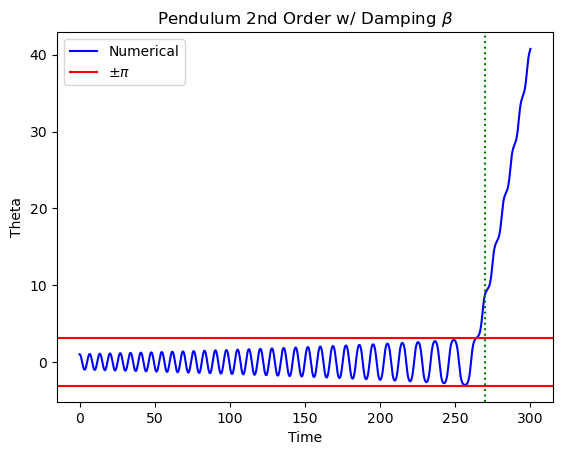

In [ ]:
b = 0
def pend_F(vec_f, t):
    return np.array([vec_f[1], -np.sin(vec_f[0]) - (2 * b * vec_f[1])])

initial_vals = np.array([1, 0])
t_numerical, thetav_numerical = euler(pend_F, initial_vals, .01 , 30000)
theta_numerical, v_numerical = np.split(thetav_numerical,2,axis=1)

plt.plot(t_numerical, theta_numerical, color = 'b', label = 'Numerical')
plt.axhline(y = -np.pi, color = 'r')
plt.axhline(y = np.pi, color = 'r', label = r'$\pm \pi$')
plt.axvline(x = 270, linestyle = ':', color = 'g')
plt.title(r'Pendulum 2nd Order w/ Damping $\beta$')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()
plt.show()

At the period 270 the pendulum seems to no longer oscillate at a predictable frequency as it once did. The period increases till $\pm \pi$ and then goes erratic. This makes sense because at small values of T (period), the theta is relativly small, but at large values the angle would have to be exponentially larger to make sense. This is shown on the graph by the blue line extending to infinity.

### Correction

<font color = blue>
Determine (by trial and error) a value $\beta$ that, when used in the damped pendulum differential equation ends up canceling out the numerical growth exactly so that we obtain a numerical solution that is something like an "undamped pendulum".  Use the same initial conditions as in the previous part.

Then, use the initial conditions $\theta_0 = 0.5$ and $\dot{\theta}_0 = 0$, and repeat the exercise.  **Discuss** the results of this analysis.

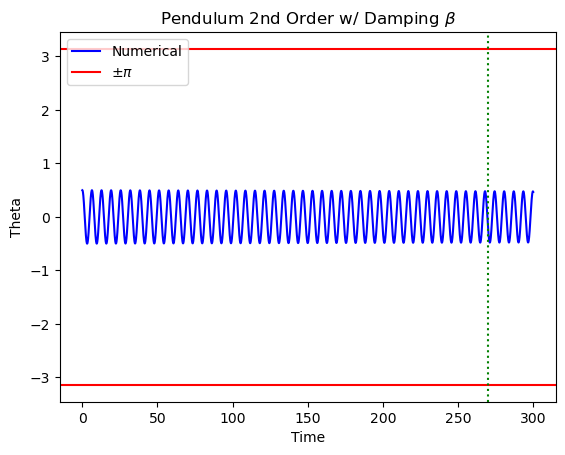

In [ ]:
b = .005

initial_vals = np.array([.5, 0])
t_numerical, thetav_numerical = euler(pend_F, initial_vals, .01 , 30000)
theta_numerical, v_numerical = np.split(thetav_numerical,2,axis=1)

plt.plot(t_numerical, theta_numerical, color = 'b', label = 'Numerical')
plt.axhline(y = -np.pi, color = 'r')
plt.axhline(y = np.pi, color = 'r', label = r'$\pm \pi$')
plt.axvline(x = 270, linestyle = ':', color = 'g')
plt.title(r'Pendulum 2nd Order w/ Damping $\beta$')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()
plt.show()

First I toyed around with the value of beta to find when it was "least-dampened" aka close to the undampened oscillating pendulum at initial values [1, 0]. I found the "perfect" beta value to be .004 to get the pendulum closed to an undampened oscillation. When I changed the initial conditions to [0.5, 0], I found the perfect beta value to be .005. In physical terms, this means that when the pendulum begins swinging at initial theta of 1, the optimal damping constant to allow for a constant period is .004 (for this equation). While, if the pendulum's initial position is 0.5, the optimal beta is .005, to allow the pendulum to swing at a constant period for the longest time.

## The Verlet Function

<font color = blue>
The Verlet method is designed to solve a second order differential equation, in the form

$$
\frac{d^2x}{dt^2} = F(x, \dot{x}, t)
$$

### Basic Code

<font color = blue>
    
Create a function that will implement the Verlet method.  Your code should input a `function` in the form $F(x, v, t)$, initial conditions `x_initial` and `v_initial`, a `step_size` and a total `step_count` = $N$.  It should output a pair of arrays, each of $N + 1$ elements: times $\{t_n\}$ and positions $\{x_n\}$.

In [ ]:
def verlet(F, x_initial, v_initial, step_size, step_count):
    n = step_count
    del_t = step_size
    ts = np.zeros((n+1,)) + 0
    xs = np.zeros((n+1,)) + x_initial
    vs = np.zeros((n+1,)) + v_initial

    for i in range(step_count):
        xs[i+1] = 2*xs[i] - xs[i-1] + F(xs[i], vs[i], ts[i]) * del_t**2
        vs[i+1] = (xs[i+1] - xs[i]) / del_t
        ts[i+1] = ts[i] + del_t
    return ts, xs

### Testing the Code

<font color = blue>
Test your code using the (dimensionless) equation for relativistic motion with a constant force:

$$
\frac{d^2x}{dt^2} = \left(1 - \left(\frac{dx}{dt}\right)^2\right)^{3/2}
$$

Have the particle begin at rest, at the origin, use a step size $0.01$, and take $N = 1000$ total steps.  Show the results together with a plot of the theoretical particle trajectory, which is

$$
x(t) = \sqrt{1 + t^2} - 1
$$

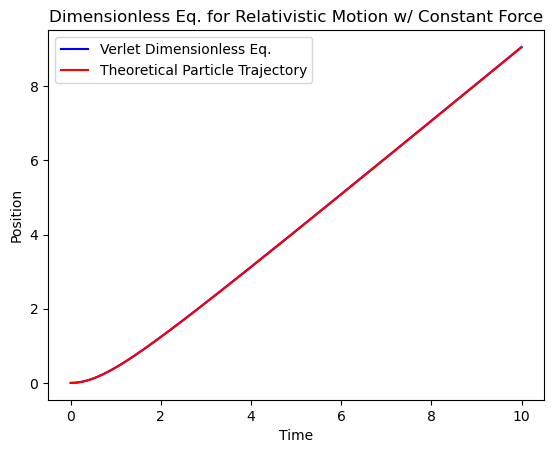

In [ ]:
def a(x, v, t):
    return (1 - v**2)**(3/2)

def theory_x(t):
    return np.sqrt(1 + t**2) - 1

ts, xs = verlet(a, np.array([0.0]), 0.0, .01, 1000)
theory_t = np.linspace(0, 10, 1001)

plt.plot(ts, xs, color = 'b', label = 'Verlet Dimensionless Eq.')
plt.plot(theory_t, theory_x(theory_t), color = 'r', label = 'Theoretical Particle Trajectory')
plt.title('Dimensionless Eq. for Relativistic Motion w/ Constant Force')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

### Discrepancies

<font color = blue>
    
A more effective way to examine way to examine the accuracy of a numerical method is to compute discrepancies.  Using the theoretical trajectory, compute the differences between the theoretical positions and the numerical positions.  Do this for a step size of $0.01$ and $N = 1000$ total steps.  Then, repeat the process, using a step size of $0.001$ and $N = 10000$ total steps.  Display both results together on a plot, and **discuss** the results.

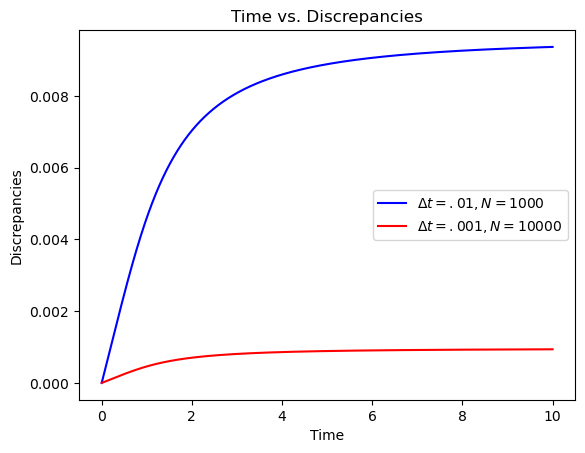

In [ ]:
ts1, xs1 = verlet(a, 0, 0, .01, 1000)

discreps1 = theory_x(ts1) - xs1 #step size of .01, n = 1000

ts2, xs2 = verlet(a, 0, 0, .001, 10000)
theory_t2 = np.linspace(0, 10, 10001)

discreps2 = theory_x(ts2) - xs2 #step size of .001, n = 10000

plt.plot(ts1, np.absolute(discreps1), color = 'b', label = r'$\Delta t = .01, N = 1000$')
plt.plot(ts2, np.absolute(discreps2), color = 'r', label = r'$\Delta t = .001, N = 10000$')
plt.title('Time vs. Discrepancies')
plt.xlabel('Time')
plt.ylabel('Discrepancies')
plt.legend()
plt.show()

The graph above shows that as the  time increases by time steps designated in the legend above, the discrepencies increase at different rates. The blue line at the top of the graph is the discrepancy line that shows how a larger time step ($\Delta t$) increases the discrepancy between the theoretical values and the numerical values over time. While the red like near the x-axis is the discrepancy of the function with a smaller $\Delta t$, as we can see the discrepancies are far less, therefore a more accurate representation of the dimensionless relativistic motion with a constant force function.

## * Relativistic Springs

<font color = blue>
The differential equation for the relativistic spring (in dimensionless form) is

$$
\ddot{x} = -x(1 - \dot{x}^2)^{3/2}
$$

### Non-Relativistic Limit

<font color = blue>
    
Create a plopt showing position vs. time in the relativistic spring system for the initial conditions $v_0 = 0$, $x_0 = .01$, together with a plot of the *non-relativistic* analytic result.  Use a time step of $0.001$, and $N = 100000$ total steps.  **Discuss** the results

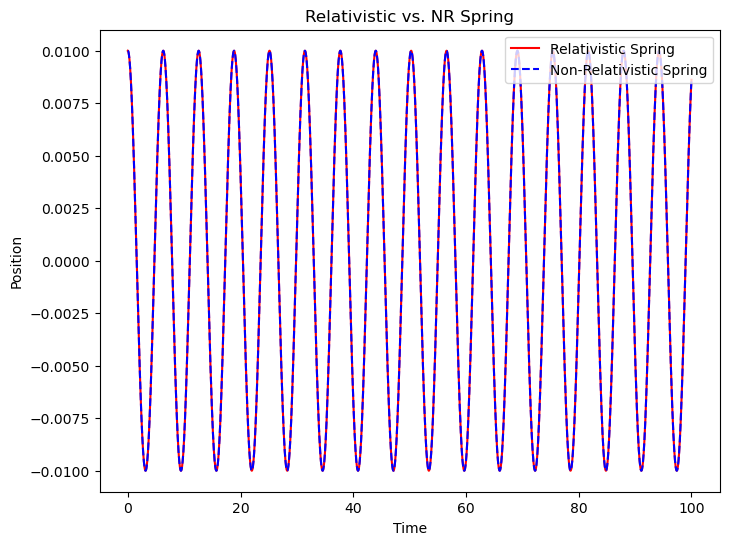

In [ ]:
def rel_spring(x, v, t):
    return -x * (1 - v**2)**(3/2)

ts_rel, xs_rel = verlet(rel_spring, .01, 0, .001, 100000)
ts_nr = np.linspace(0, 100, 100001)
xs_nr = 0.01 * np.cos(ts_nr * 1)

plt.figure(figsize = (8,6))
plt.plot(ts_rel, xs_rel, color = 'r', label = 'Relativistic Spring')
plt.plot(ts_nr, xs_nr, color = 'b', linestyle = '--', label = 'Non-Relativistic Spring')
plt.title('Relativistic vs. NR Spring')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(loc = 'upper right')
plt.show()

The Non-Relativistic spring shows simple harmonic motion with a period of 2$\pi$. Although the relativistic spring shows something very similar if not exactly the same. This makese sense in my mind, because the period nor velocity never gets close to c, so the effects of relativity should not impair the simple harmonic motion of the spring.

### Highly Relativistic Limit

<font color = blue>
    
Now create a plot of position vs. time with the initial conditions $v_0 = 0$ and $x_0 = 10.0$.  In this case your don't have to display the extreme relativistic limit on the plot (creating a triangle wave is a little annoying), but do show a vertical line at one "extreme relativistic period".  **Discuss** the results (and explain the calculation of the period).

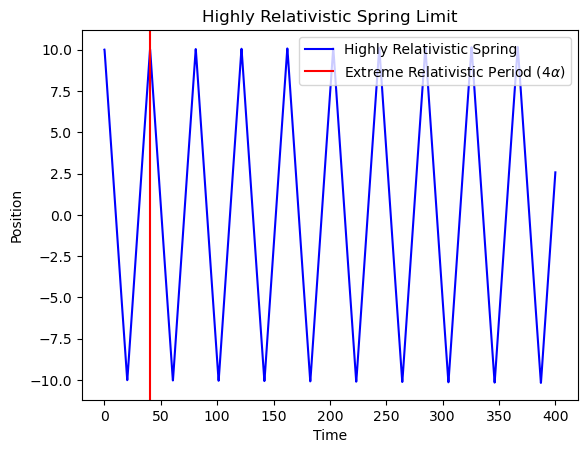

In [ ]:
ts_high_rel, xs_high_rel = verlet(rel_spring, 10, 0, .001, 400000)
alpha = xs_high_rel[0]
period = 4 * alpha

plt.plot(ts_high_rel, xs_high_rel, color = 'b', label = 'Highly Relativistic Spring')
plt.axvline(x = period, color = 'r', label = r'Extreme Relativistic Period (4$\alpha$)')
plt.title('Highly Relativistic Spring Limit')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

The highly relativistic spring limit or period, was calculated by 4$\alpha$. $\alpha$ is the initial value when x is 0. So $x(0) = \alpha$, and then I multplied it by 4 to get the period of the triangle wave.

### Multiple Position Graphs

<font color = blue>
    
Now create a single graph which include multiple different initial conditions: use $v_0 = 0$, but $x_0 \in \{0.1, 0.5, 1.0, 5.0, 10.0\}$.  **Discuss** the results.

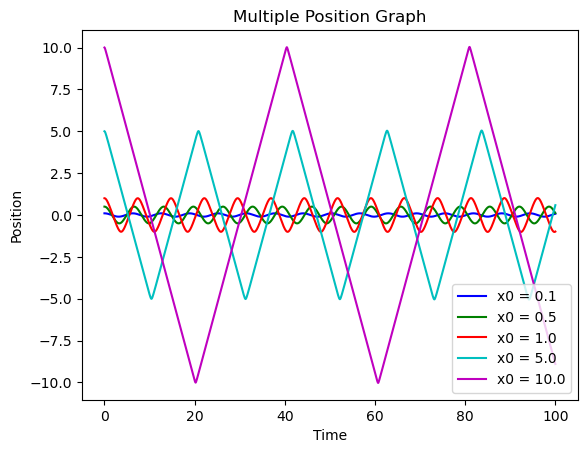

Initial Positions: [ 0.1  0.5  1.   5.  10. ]


In [ ]:
x0 = np.array([.1,.5,1,5,10])
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(len(x0)):
    ts_mult, xs_mult = verlet(rel_spring, x0[i], 0, .001, 100000)
    plt.plot(ts_mult, xs_mult, color = colors[i], label = f'x0 = {x0[i]}')
    plt.title('Multiple Position Graph')
    plt.xlabel('Time')
    plt.ylabel('Position')
plt.legend()
plt.show()
print(f'Initial Positions: {x0}')

The graph above shows the relativistic spring function starting a different values of $x_0$ but $v_0$ is equal to 0 for all values. I can very clearly tell when the sinusoidal oscillations turn to triangle waves. from .1 to 1, the function gives a normal oscillating wave, while from 5-10 the function seems to give a relativistic version of the oscillating pendulum.

### Velocity Graphs

<font color = blue>
    
Use the lists of positions and times that you have just created to generate lists of velocities.  Create a single plot of these.  **Discuss** the results.

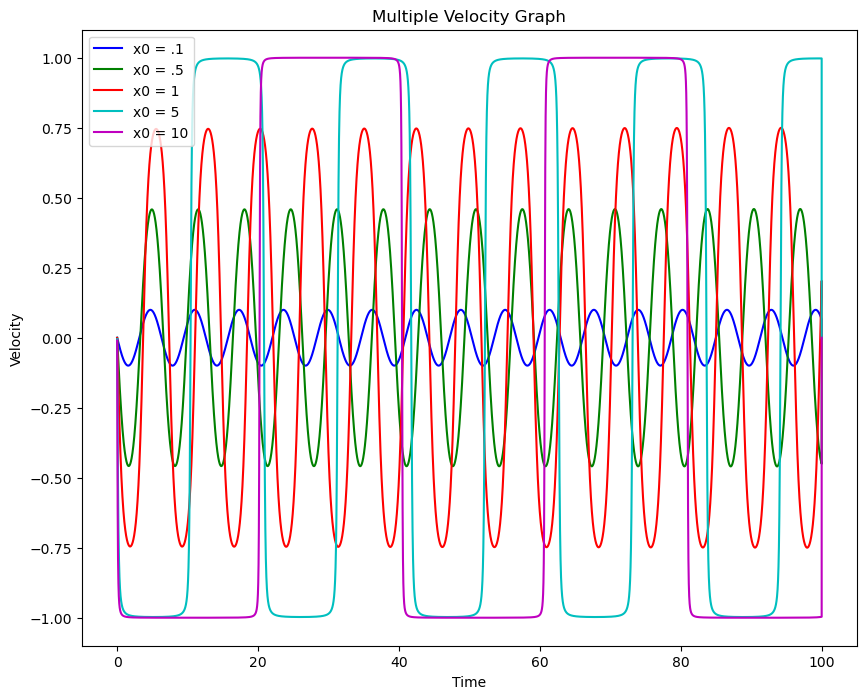

In [ ]:
x0 = np.array([.1,.5,1,5, 10])
ts_mult, xs_mult = verlet(rel_spring, .1, 0 , .001, 100001)
v0 = np.array([0.00]*100002)
for i in range(len(v01)-1):
    v0[i] = (xs_mult[i+1] - xs_mult[i]) / .001

ts_mult, xs_mult1 = verlet(rel_spring, .5, 0 , .001, 100001)
v01 = np.array([0.00]*100002)
for i in range(len(v01)-1):
    v01[i] = (xs_mult1[i+1] - xs_mult1[i]) / .001

ts_mult, xs_mult2 = verlet(rel_spring, 1, 0 , .001, 100001)
v02 = np.array([0.00]*100002)
for i in range(len(v01)-1):
    v02[i] = (xs_mult2[i+1] - xs_mult2[i]) / .001

ts_mult, xs_mult3 = verlet(rel_spring, 5, 0 , .001, 100001)
v03 = np.array([0.00]*100002)
for i in range(len(v01)-1):
    v03[i] = (xs_mult3[i+1] - xs_mult3[i]) / .001

ts_mult, xs_mult4 = verlet(rel_spring, 10, 0 , .001, 100001)
v04 = np.array([0.00]*100002)
for i in range(len(v01)-1):
    v04[i] = (xs_mult4[i+1] - xs_mult4[i]) / .001

plt.figure(figsize = (10, 8))
plt.plot(ts_mult, v0, color = colors[0], label = 'x0 = .1')
plt.plot(ts_mult, v01, color = colors[1], label = 'x0 = .5')
plt.plot(ts_mult, v02, color = colors[2], label = 'x0 = 1')
plt.plot(ts_mult, v03, color = colors[3], label = 'x0 = 5')
plt.plot(ts_mult, v04, color = colors[4], label = 'x0 = 10')
plt.title('Multiple Velocity Graph')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.show()

I created a graph of 5 velocities as they correspond to the initial x0 values given above. I used the basic equation $v = \frac{\Delta x}{\Delta t}$, to find each velocity graph. The colors correspond to the colors in the above position graph so it is easy to tell which function is which. As we can clearly see again, from .1-1 the velocity is sinusoidal (like the position), but from 5-10 the velocity is much different, more so like a square wave as opposed to a sine or cosine wave.

## Any Other Problem

<font color = blue>
Come up with a physics problem (different from the ones analyzed above) that you can use the Verlet method to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.  

[0.00000e+00 4.00000e-04 8.00000e-04 ... 1.59992e+01 1.59996e+01
 1.60000e+01]


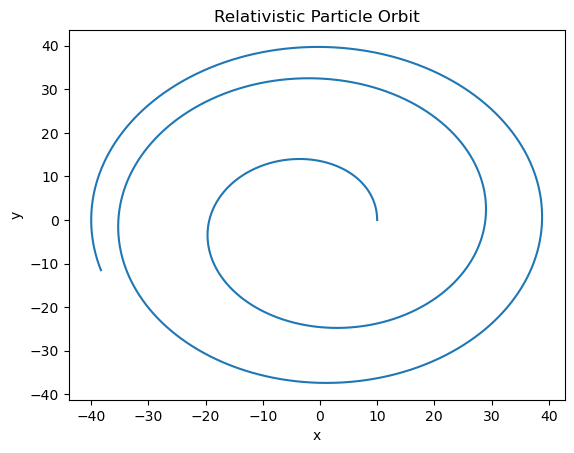

In [ ]:
G = 1
M = 1
L = 4

del_t = 0.01
t_max = 100

r0 = 10
phi0 = 0
r_dot0 = 0
phi_dot0 = L / r0**2

def verlet(F, x_initial, v_initial, step_size, step_count):
    n = step_count
    del_t = step_size
    ts = np.zeros((n+1,)) + 0
    xs = np.zeros((n+1,)) + x_initial
    vs = np.zeros((n+1,)) + v_initial

    for i in range(step_count):
        xs[i+1] = 2 * xs[i] - xs[i-1] + F(xs[i], vs[i], ts[i]) * del_t**2
        vs[i+1] = (xs[i+1] - xs[i]) / del_t
        ts[i+1] = ts[i] + del_t

    return ts, xs, vs # returning the vs to get the radial position so i can plot it on an xy- plane

def radial_acceleration(r, v_r, t):
    return -G * M / r**2 + (L**2) / r**3

step_count = 4 * int(t_max / del_t)
ts, rs, rs_dot = verlet(radial_acceleration, r0, r_dot0, del_t, step_count)

phis = np.zeros_like(ts)

for i in range(1, step_count+1):
    phis[i] = phis[i-1] + phi_dot0 * del_t
print(phis)
# convet to cartesian
x_values = rs * np.cos(phis)
y_values = rs * np.sin(phis)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relativistic Particle Orbit')
plt.show()


For this any other problem I wanted to find how a particle would react to a strong gravitational field. For example, if a small planet was near a large black hole, above is how the trajectory would look. The first thing I did was assign values to all the constants, such as the gravitational constant, mass of large "thing" with gravitational field, angular momentum of the small planet etc. I also set the time and initial radial position. Then I used my verlet function to calculate the times, positions, and velocities for my radial acceleration function that takes gravitational and centriful forces into account (something that cant be solved analytically). Something that differs from my code above is not only do I also output the velocity (in order to get radial velocity), but I also change step count so I can control how long the simulation keeps going. I looked a few different values of step count and the graph returns something more complex every time. I then calculated angular position, which can be done analytically. And finally converted to cartesian so I could plot it relating to how it might look physically.